# 1. KHAI BÁO THƯ VIỆN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 2. TẢI DỮ LIỆU

In [2]:
print("LOAD VÀ KHÁM PHÁ DỮ LIỆU BAN ĐẦU")

df = pd.read_csv('../data/raw/customer_shopping.csv')

print(f"  - Số dòng: {df.shape[0]:,}")
print(f"  - Số cột: {df.shape[1]}")
print(f"  - Kích thước bộ nhớ: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Hiển thị thông tin cơ bản
print("\n" + "-"*60)
print("CẤU TRÚC DỮ LIỆU:")
print("-"*60)
df.info()

print("\n" + "-"*60)
print("5 DÒNG ĐẦU TIÊN:")
print("-"*60)
print(df.head())

print("\n" + "-"*60)
print("THỐNG KÊ MÔ TẢ:")
print("-"*60)
print(df.describe())

LOAD VÀ KHÁM PHÁ DỮ LIỆU BAN ĐẦU
  - Số dòng: 99,457
  - Số cột: 10
  - Kích thước bộ nhớ: 45.45 MB

------------------------------------------------------------
CẤU TRÚC DỮ LIỆU:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB

-----------------------------------------------

# 3. KIỂM TRA CHẤT LƯỢNG DỮ LIỆU

In [3]:
print("KIỂM TRA CHẤT LƯỢNG DỮ LIỆU")

# 3.1 Missing Values
print("\n[1] MISSING VALUES:")
missing_vals = df.isnull().sum()
missing_percent = (missing_vals / len(df)) * 100
missing_df = pd.DataFrame({
    'Số lượng': missing_vals,
    'Tỷ lệ (%)': missing_percent
})
missing_df = missing_df[missing_df['Số lượng'] > 0].sort_values('Số lượng', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 5))
    plt.bar(missing_df.index, missing_df['Tỷ lệ (%)'])
    plt.title('Tỷ lệ Missing Values theo Cột', fontsize=14, fontweight='bold')
    plt.xlabel('Cột')
    plt.ylabel('Tỷ lệ (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('figures/01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n Đã lưu biểu đồ: figures/01_missing_values.png")
else:
    print("Không có missing values!")

# 3.2 Duplicate Records
print("\n[2] DUPLICATE RECORDS:")
duplicates = df.duplicated().sum()
print(f"  - Số dòng trùng lặp: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("Cần xử lý duplicate records!")
else:
    print("Không có dòng trùng lặp!")

# 3.3 Data Types Check
print("\n[3] KIỂM TRA KIỂU DỮ LIỆU:")
print(df.dtypes)


KIỂM TRA CHẤT LƯỢNG DỮ LIỆU

[1] MISSING VALUES:
Không có missing values!

[2] DUPLICATE RECORDS:
  - Số dòng trùng lặp: 0 (0.00%)
Không có dòng trùng lặp!

[3] KIỂM TRA KIỂU DỮ LIỆU:
invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object


# 4. LÀM SẠCH DỮ LIỆU

LÀM SẠCH DỮ LIỆU

[1] XỬ LÝ MISSING VALUES:

[2] XỬ LÝ DUPLICATES:
Đã xóa 0 dòng trùng lặp

[3] CHUYỂN ĐỔI DATA TYPES:
invoice_date → datetime

[4] XỬ LÝ OUTLIERS:
  - quantity: 0 outliers (0.00%)
    Range hợp lệ: [-1.00, 7.00]
  - price: 5,024 outliers (5.05%)
    Range hợp lệ: [-1686.85, 2932.62]


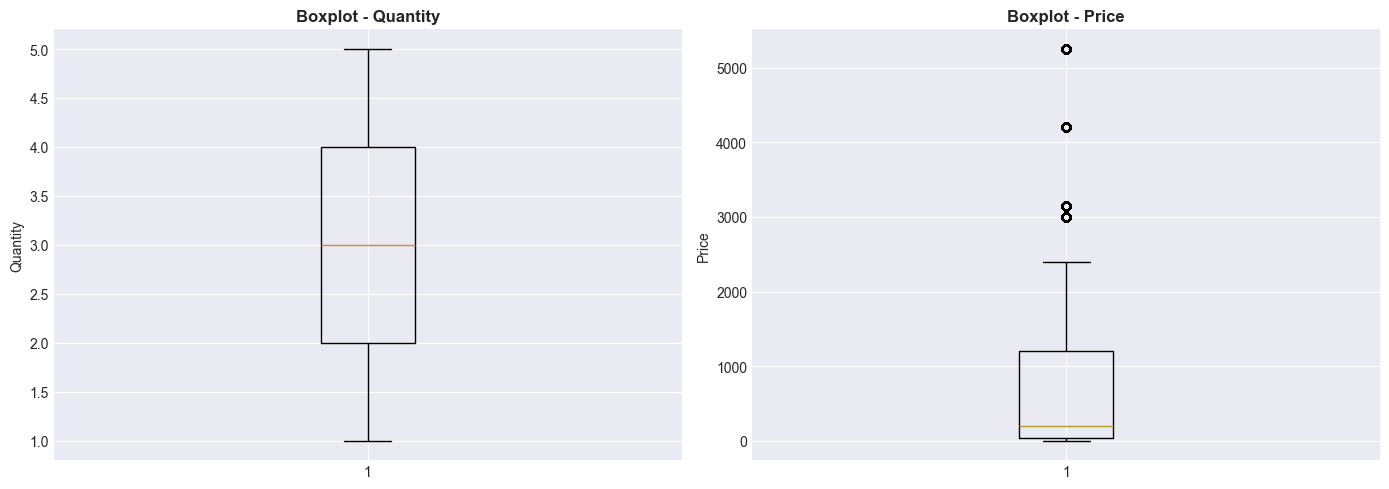


 Đã lưu biểu đồ: figures/02_outliers_detection.png

 Giữ outliers (có thể là bulk purchases hợp lệ)


In [4]:
print("LÀM SẠCH DỮ LIỆU")


# Tạo bản sao để xử lý
df_clean = df.copy()

# 4.1 Xử lý Missing Values
print("\n[1] XỬ LÝ MISSING VALUES:")
# Chiến lược: 
# - Numeric: fill với median
# - Categorical: fill với mode hoặc 'Unknown'
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"   {col}: điền median")
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            print(f"   {col}: điền mode")

# 4.2 Xử lý Duplicates
print("\n[2] XỬ LÝ DUPLICATES:")
before_dup = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_dup = len(df_clean)
print(f"Đã xóa {before_dup - after_dup:,} dòng trùng lặp")

# 4.3 Chuyển đổi Data Types
print("\n[3] CHUYỂN ĐỔI DATA TYPES:")
# Convert invoice_date to datetime
if 'invoice_date' in df_clean.columns:
    df_clean['invoice_date'] = pd.to_datetime(df_clean['invoice_date'], format='%d/%m/%Y')
    print("invoice_date → datetime")

# 4.4 Xử lý Outliers (cho quantity và price)
print("\n[4] XỬ LÝ OUTLIERS:")

def detect_outliers_iqr(data, column):
    """Phát hiện outliers bằng IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Phát hiện outliers cho quantity
if 'quantity' in df_clean.columns:
    outliers_qty, lb_qty, ub_qty = detect_outliers_iqr(df_clean, 'quantity')
    print(f"  - quantity: {len(outliers_qty):,} outliers ({len(outliers_qty)/len(df_clean)*100:.2f}%)")
    print(f"    Range hợp lệ: [{lb_qty:.2f}, {ub_qty:.2f}]")

# Phát hiện outliers cho price
if 'price' in df_clean.columns:
    outliers_price, lb_price, ub_price = detect_outliers_iqr(df_clean, 'price')
    print(f"  - price: {len(outliers_price):,} outliers ({len(outliers_price)/len(df_clean)*100:.2f}%)")
    print(f"    Range hợp lệ: [{lb_price:.2f}, {ub_price:.2f}]")

# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if 'quantity' in df_clean.columns:
    axes[0].boxplot(df_clean['quantity'], vert=True)
    axes[0].set_title('Boxplot - Quantity', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Quantity')

if 'price' in df_clean.columns:
    axes[1].boxplot(df_clean['price'], vert=True)
    axes[1].set_title('Boxplot - Price', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Price')

plt.tight_layout()
plt.savefig('figures/02_outliers_detection.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu biểu đồ: figures/02_outliers_detection.png")

# Quyết định: Giữ outliers nhưng ghi nhận (vì có thể là giao dịch hợp lệ)
print("\n Giữ outliers (có thể là bulk purchases hợp lệ)")

# 5. BIẾN ĐỔI VÀ TẠO ĐẶC TRƯNG

In [5]:
print("BIẾN ĐỔI VÀ TẠO ĐẶC TRƯNG")

# 5.1 Tạo biến total_amount
print("\n[1] TẠO BIẾN TOTAL_AMOUNT:")
if 'quantity' in df_clean.columns and 'price' in df_clean.columns:
    df_clean['total_amount'] = df_clean['quantity'] * df_clean['price']
    print(f"  total_amount = quantity × price")
    print(f"  - Min: ${df_clean['total_amount'].min():.2f}")
    print(f"  - Max: ${df_clean['total_amount'].max():.2f}")
    print(f"  - Mean: ${df_clean['total_amount'].mean():.2f}")
    print(f"  - Median: ${df_clean['total_amount'].median():.2f}")

# 5.2 Trích xuất Time Features
print("\n[2] TRÍCH XUẤT TIME FEATURES:")
if 'invoice_date' in df_clean.columns:
    df_clean['year'] = df_clean['invoice_date'].dt.year
    df_clean['month'] = df_clean['invoice_date'].dt.month
    df_clean['day'] = df_clean['invoice_date'].dt.day
    df_clean['day_of_week'] = df_clean['invoice_date'].dt.dayofweek  # 0=Monday
    df_clean['day_name'] = df_clean['invoice_date'].dt.day_name()
    df_clean['hour'] = df_clean['invoice_date'].dt.hour
    df_clean['quarter'] = df_clean['invoice_date'].dt.quarter
    df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6]).astype(int)
    
    print("  Đã tạo các features:")
    print("  - year, month, day")
    print("  - day_of_week, day_name")
    print("  - hour, quarter")
    print("  - is_weekend (0/1)")

# 5.3 Tạo Age Groups
print("\n[3] TẠO AGE GROUPS:")
if 'age' in df_clean.columns:
    def categorize_age(age):
        if age < 18:
            return 'Teen'
        elif age < 25:
            return 'Young Adult'
        elif age < 40:
            return 'Adult'
        elif age < 60:
            return 'Middle Age'
        else:
            return 'Senior'
    
    df_clean['age_group'] = df_clean['age'].apply(categorize_age)
    print("    age_group: Teen, Young Adult, Adult, Middle Age, Senior")
    print("\n  Phân bố:")
    print(df_clean['age_group'].value_counts())

# 5.4 Tính RFM cho mỗi khách hàng
print("\n[4] TÍNH RFM METRICS:")
if all(col in df_clean.columns for col in ['customer_id', 'invoice_date', 'total_amount']):
    # Recency: số ngày từ lần mua cuối đến ngày hiện tại
    current_date = df_clean['invoice_date'].max()
    
    rfm = df_clean.groupby('customer_id').agg({
        'invoice_date': lambda x: (current_date - x.max()).days,  # Recency
        'invoice_no': 'count',  # Frequency
        'total_amount': 'sum'  # Monetary
    }).reset_index()
    
    rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
    
    print("    RFM Metrics:")
    print("    - Recency: Số ngày từ lần mua cuối")
    print("    - Frequency: Số lần mua")
    print("    - Monetary: Tổng tiền đã chi")
    print("\n  Thống kê RFM:")
    print(rfm[['recency', 'frequency', 'monetary']].describe())
    
    # Merge RFM vào df_clean
    df_clean = df_clean.merge(rfm, on='customer_id', how='left')
    print("\n   Đã merge RFM vào dataset chính")

# 5.5 Price Range Categories
print("\n[5] TẠO PRICE RANGE CATEGORIES:")
if 'price' in df_clean.columns:
    df_clean['price_range'] = pd.cut(df_clean['price'], 
                                     bins=[0, 50, 100, 200, 500, float('inf')],
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    print("    price_range: Very Low, Low, Medium, High, Very High")
    print("\n  Phân bố:")
    print(df_clean['price_range'].value_counts())

BIẾN ĐỔI VÀ TẠO ĐẶC TRƯNG

[1] TẠO BIẾN TOTAL_AMOUNT:
  total_amount = quantity × price
  - Min: $5.23
  - Max: $26250.00
  - Mean: $2528.79
  - Median: $600.17

[2] TRÍCH XUẤT TIME FEATURES:
  Đã tạo các features:
  - year, month, day
  - day_of_week, day_name
  - hour, quarter
  - is_weekend (0/1)

[3] TẠO AGE GROUPS:
    age_group: Teen, Young Adult, Adult, Middle Age, Senior

  Phân bố:
age_group
Middle Age     38084
Adult          28834
Senior         19043
Young Adult    13496
Name: count, dtype: int64

[4] TÍNH RFM METRICS:
    RFM Metrics:
    - Recency: Số ngày từ lần mua cuối
    - Frequency: Số lần mua
    - Monetary: Tổng tiền đã chi

  Thống kê RFM:
            recency  frequency      monetary
count  99457.000000    99457.0  99457.000000
mean     396.884030        1.0   2528.789268
std      229.871351        0.0   4222.475781
min        0.000000        1.0      5.230000
25%      198.000000        1.0    136.350000
50%      396.000000        1.0    600.170000
75%      597.0

# 6. CHUẨN HÓA DỮ LIỆU

In [6]:
print("CHUẨN HÓA DỮ LIỆU")


from sklearn.preprocessing import StandardScaler, LabelEncoder


#Label Encoding cho categorical features
print("\n LABEL ENCODING CHO CATEGORICAL FEATURES:")
categorical_cols = ['gender', 'category', 'payment_method', 'shopping_mall', 'age_group']
categorical_cols = [col for col in categorical_cols if col in df_clean.columns]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"{col} → {col}_encoded")

CHUẨN HÓA DỮ LIỆU

 LABEL ENCODING CHO CATEGORICAL FEATURES:
gender → gender_encoded
category → category_encoded
payment_method → payment_method_encoded
shopping_mall → shopping_mall_encoded
age_group → age_group_encoded


# 7. XUẤT DỮ LIỆU ĐÃ ĐƯỢC LÀM SẠCH

In [7]:
print("XUẤT DỮ LIỆU ĐÃ ĐƯỢC LÀM SẠCH")

# 7.1 Lưu cleaned data
output_path = '../data/processed/cleaned_data.csv'
df_clean.to_csv(output_path, index=False)
print(f"\n  Đã lưu cleaned data: {output_path}")
print(f"  - Shape: {df_clean.shape}")
print(f"  - Kích thước: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 7.2 Tạo data dictionary
print("\n[DATA DICTIONARY]:")
data_dict = {
    'Column': df_clean.columns,
    'Type': df_clean.dtypes,
    'Null Count': df_clean.isnull().sum(),
    'Unique Values': [df_clean[col].nunique() for col in df_clean.columns]
}
dict_df = pd.DataFrame(data_dict)
print(dict_df.to_string(index=False))

# 7.3 Lưu label encoders (để decode sau này)
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("\n  Đã lưu label encoders: label_encoders.pkl")

XUẤT DỮ LIỆU ĐÃ ĐƯỢC LÀM SẠCH

  Đã lưu cleaned data: ../data/processed/cleaned_data.csv
  - Shape: (99457, 29)
  - Kích thước: 59.84 MB

[DATA DICTIONARY]:
                Column           Type  Null Count  Unique Values
            invoice_no         object           0          99457
           customer_id         object           0          99457
                gender         object           0              2
                   age          int64           0             52
              category         object           0              8
              quantity          int64           0              5
                 price        float64           0             40
        payment_method         object           0              3
          invoice_date datetime64[ns]           0            797
         shopping_mall         object           0             10
          total_amount        float64           0             40
                  year          int32           0              

# 8. BÁO CÁO TỔNG KẾT

In [8]:
print("TỔNG KẾT PREPROCESSING")

summary = f"""
KẾT QUẢ PREPROCESSING:

1. DỮ LIỆU GỐC:
   - Số dòng: {df.shape[0]:,}
   - Số cột: {df.shape[1]}

2. DỮ LIỆU SAU XỬ LÝ:
   - Số dòng: {df_clean.shape[0]:,} ({df_clean.shape[0]/df.shape[0]*100:.2f}%)
   - Số cột: {df_clean.shape[1]}
   
3. CÁC BƯỚC ĐÃ THỰC HIỆN:
   - Xử lý missing values
   - Loại bỏ duplicates
   - Phát hiện và xử lý outliers
   - Feature engineering (total_amount, time features, age_group, RFM)
   - Chuẩn hóa dữ liệu (StandardScaler)
   - Label encoding cho categorical features

4. FEATURES MỚI:
   - total_amount
   - year, month, day, day_of_week, hour, quarter
   - age_group
   - recency, frequency, monetary (RFM)
   - price_range
   - is_weekend

5. SẴN SÀNG CHO:
   - Exploratory Data Analysis
   - Clustering Analysis
   - Association Rules Mining
   - Classification Models

OUTPUT FILES:
   - cleaned_data.csv
   - label_encoders.pkl
   - Figures: 02_outliers_detection.png
   - preprocessing_report.md
"""

print(summary)

# Lưu summary report
with open('preprocessing_report.md', 'w', encoding='utf-8') as f:
    f.write(summary)

TỔNG KẾT PREPROCESSING

KẾT QUẢ PREPROCESSING:

1. DỮ LIỆU GỐC:
   - Số dòng: 99,457
   - Số cột: 10

2. DỮ LIỆU SAU XỬ LÝ:
   - Số dòng: 99,457 (100.00%)
   - Số cột: 29

3. CÁC BƯỚC ĐÃ THỰC HIỆN:
   - Xử lý missing values
   - Loại bỏ duplicates
   - Phát hiện và xử lý outliers
   - Feature engineering (total_amount, time features, age_group, RFM)
   - Chuẩn hóa dữ liệu (StandardScaler)
   - Label encoding cho categorical features

4. FEATURES MỚI:
   - total_amount
   - year, month, day, day_of_week, hour, quarter
   - age_group
   - recency, frequency, monetary (RFM)
   - price_range
   - is_weekend

5. SẴN SÀNG CHO:
   - Exploratory Data Analysis
   - Clustering Analysis
   - Association Rules Mining
   - Classification Models

OUTPUT FILES:
   - cleaned_data.csv
   - label_encoders.pkl
   - Figures: 02_outliers_detection.png
   - preprocessing_report.md

